Source:

https://alternativetransport.wordpress.com/2015/05/05/34/

# Lexical Distance

* Calculated as the total Levenshtein distance among Swadesh lists, right? How concerning is differing orthography in this?
* Original procedure by Tishchenko (1997)
* No need to rederive 3D embedded lexical distances, unless you just want to do it for funsies
* 

# Sources:

* Teresa Elms at the Etymologikon 
** https://web.archive.org/web/20140107030355/http://elms.wordpress.com/2008/03/04/.
** Elms only claims the RESEARCH DATA comes from 1999, Metatheory of Linguistics
** Looks like it's actually 1

## Metatheory of LInguistics:
### Website
** https://web.archive.org/web/20081226142846/http://www.langs.com.ua/publics/KM/Metateoria/index.htm
### Book
lexical-distance-among-languages-of-europe
** AHA! Found it!! (https://annas-archive.org/md5/3b8558004ba52f86b6698c79d0a44d09)
** Page 266-267 shows us the original version of, THE CHART, referencing section 4.100.6 (Thanks, Tyshchenko!)
*  K. Tyshchenko (1999), Metatheory of Linguistics
## Other
** This is his doctoral dissertation by the same name, 1992?
** Bibliography: https://web.archive.org/web/20070927203144/http://www.langs.com.ua/contacts/1/Bibliography.htm
** According to the bibliography, he published not a paper with that name in 1999
** MOST LIKELY this: 3. Лекції з генетичного мовознавства (Передісторія мовлення. Палеосигніфіка. Історична синтактика.) – К.: КНУ.  (3,0 д.а.).

** https://alternativetransport.wordpress.com/2015/05/04/how-much-does-language-change-when-it-travels/




# Original Graph:

§ 4.100.b. Differential lexical distances among the languages of Europe (in %) (according to A. Ya. Shaikevich, M. Echenique, et al.)

(I could track down the original data but honestly I'm fine just reproducing the lexical distance method myself.)
I'll use the Swadesh list, 207 words should be enough~!

In [78]:
!pip install cielab

DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from statistics import mean

In [80]:
pd.set_option("display.max_columns", None)

In [81]:
from sklearn.manifold import MDS

In [82]:
pd.set_option('display.max_rows', None)


In [83]:
# Loading in Languages

# We'll keep the scope European-only for now.

# European languages
prefix = "./data/swadesh/"
romance = pd.read_csv("{0}romance.tsv".format(prefix), sep="\t")
gmc = pd.read_csv("{0}germanic.tsv".format(prefix), sep="\t")
celtic = pd.read_csv("{0}CELTIC.tsv".format(prefix), sep="\t")
slavic = pd.read_csv("{0}SLAVIC.tsv".format(prefix), sep="\t")
hellenic = pd.read_csv("{0}greek.tsv".format(prefix), sep="\t")

In [84]:
print(romance.columns)
print(gmc.columns)
print(celtic.columns)
print(slavic.columns)
print(hellenic.columns)


Index([' No ', 'English ', 'Latin ', 'Outliers', 'My PIE', 'Portuguese ',
       'Spanish ', 'Catalan ', 'French ', 'Italian ', 'Romanian ',
       'Lengadocian Occitan ', 'Gascon Occitan ', 'Romansh',
       'Ticinese Lombard', '?', 'Neapolitan ', 'Venetian', 'Sicilian',
       'Maceratese Italian', 'Galician', 'Asturian', 'Aragonese', 'Catalan'],
      dtype='object')
Index(['№ ', 'English ', 'Gothic ', 'Unnamed: 3', 'PIE', 'Scots ',
       'West Frisian ', 'Dutch ', 'Afrikaans ', 'Low Saxon ', 'Limburgish ',
       'Central Franconian ', 'Luxembourgish ', 'German ', 'Yiddish ',
       'Danish ', 'Swedish ', 'Faroese ', 'Icelandic ', 'Norwegian (bokmål) ',
       'Norwegian (nynorsk) ', 'Gothic .1', 'Nr', 'English',
       'Sranan @ Surinam'],
      dtype='object')
Index(['№', 'English', 'Proto-Celtic (WTF WTF!)', 'Best', 'PIE', 'Unnamed: 5',
       'Breton', 'Cornish', 'Welsh', 'Old Irish (some German!)', 'Irish',
       'Scottish Gaelic', 'Manx', 'Gaulish'],
      dtype='object')
I

In [85]:
# Clean unnecessary columns

romance = romance.drop(columns=["Outliers", "My PIE", "?", "Lengadocian Occitan ", "Maceratese Italian", "Gascon Occitan ", "English ", " No ", "Romansh", "Neapolitan ", 'Ticinese Lombard', 'Venetian', 'Sicilian', 'Galician', 'Asturian', 'Aragonese', 'Catalan '])
gmc = gmc.drop(columns=['№ ',  'Unnamed: 3',
       'Central Franconian ', 'Gothic .1', 'Nr', 
       'Sranan @ Surinam', 'Limburgish ', 'Luxembourgish ', 'English ', 'PIE', 'Low Saxon ', 'West Frisian ', 'Yiddish '])
celtic = celtic.drop(columns=['№', 'Best', 'PIE', 'Unnamed: 5',
       'Old Irish (some German!)', 'English', 'Gaulish'])
celtic = celtic.rename(columns={
    "Proto-Celtic (WTF WTF!)": "Proto-Celtic"
})
hellenic = hellenic.rename(columns={
    'Greek ελληνικά (elliniká) ': "Greek",
       'Ancient Greek ἑλληνική (hellēnikḗ) ': "Ancient_Greek"
})
slavic = slavic.drop(columns=['№ ', 'English ', 'Aryan', 
              'Unnamed: 18', 'Silesian~German(missing)', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Serbo-Croatian Latin ', 'Serbo-Croatian Cyrillic ', 'Rusyn ', 'Lower Sorbian ' , 'Upper Sorbian '])
hellenic = hellenic.drop(columns=['No. ', 'English ', 'IE', 'Unnamed: 3',
       'IPA pronunciation', 'Unnamed: 6'])

In [86]:
print(romance.columns)
print(gmc.columns)
print(celtic.columns)
print(slavic.columns)
print(hellenic.columns)


Index(['Latin ', 'Portuguese ', 'Spanish ', 'French ', 'Italian ', 'Romanian ',
       'Catalan'],
      dtype='object')
Index(['Gothic ', 'Scots ', 'Dutch ', 'Afrikaans ', 'German ', 'Danish ',
       'Swedish ', 'Faroese ', 'Icelandic ', 'Norwegian (bokmål) ',
       'Norwegian (nynorsk) ', 'English'],
      dtype='object')
Index(['Proto-Celtic', 'Breton', 'Cornish', 'Welsh', 'Irish',
       'Scottish Gaelic', 'Manx'],
      dtype='object')
Index(['Old Church Slavonic ', 'Czech ', 'Polish ', 'Slovak ', 'Bulgarian ',
       'Macedonian ', 'Slovene ', 'Belarusian ', 'Russian ', 'Ukrainian'],
      dtype='object')
Index(['Greek', 'Ancient_Greek'], dtype='object')


In [87]:
all = pd.concat([romance, gmc, celtic, slavic, hellenic], axis=1)[:207]
print(all.columns)


Index(['Latin ', 'Portuguese ', 'Spanish ', 'French ', 'Italian ', 'Romanian ',
       'Catalan', 'Gothic ', 'Scots ', 'Dutch ', 'Afrikaans ', 'German ',
       'Danish ', 'Swedish ', 'Faroese ', 'Icelandic ', 'Norwegian (bokmål) ',
       'Norwegian (nynorsk) ', 'English', 'Proto-Celtic', 'Breton', 'Cornish',
       'Welsh', 'Irish', 'Scottish Gaelic', 'Manx', 'Old Church Slavonic ',
       'Czech ', 'Polish ', 'Slovak ', 'Bulgarian ', 'Macedonian ', 'Slovene ',
       'Belarusian ', 'Russian ', 'Ukrainian', 'Greek', 'Ancient_Greek'],
      dtype='object')


In [88]:
all

,Latin,Portuguese,Spanish,French,Italian,Romanian,Catalan,Gothic,Scots,Dutch,Afrikaans,German,Danish,Swedish,Faroese,Icelandic,Norwegian (bokmål),Norwegian (nynorsk),English,Proto-Celtic,Breton,Cornish,Welsh,Irish,Scottish Gaelic,Manx,Old Church Slavonic,Czech,Polish,Slovak,Bulgarian,Macedonian,Slovene,Belarusian,Russian,Ukrainian,Greek,Ancient_Greek
0,ego,eu,yo,je,io,eu,jo,𐌹𐌺 (ik),A,ik,ek,ich,jeg,jag,"eg, jeg (Suðuroy)",ég,jeg,eg,I,*mī,me,my,"mi, fi",mé,mi,mee,азъ (azŭ),já,ja,ja,аз (az),јас (jas),jaz,я (ja),я (ja),я (ja),εγώ (egó),ἐγώ (egṓ)
1,tū,tu,tú,tu,tu,tu,tu,𐌸𐌿 (þu),"thoo, you, ye","jij, je (informal), u (formal)","jy (informal), u (formal)",du,"du, De (formal)",du,tú,þú,"du, De (formal)","du, De (formal)",you (singular),*tū,te,ty,ti,tú,thu,oo,тꙑ (ty),ty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"εσύ (esý), εσείς (eseís) (formal)",σύ (sú)
2,"is, ille (that one)",ele,él,il,lui,"el m, ea f",ell,𐌹𐍃 (is),he,hij,hy,er,han,han,hann,hann,han,han,he,*em,eñ,ev,"ef, fe, fo",sé,e,eh,"онъ (onŭ), тъ (tŭ)",on,on,on,той (toj),тој (toj),on,ён (jón),он (on),він (vin),αυτός (aftós),"αὐτός (autós), οὗ (hoû), ὅς (hós), ὁ (ho), οὗτος (hoûtos)"
3,"nōs, (genitive pl : nostrī)",nós,nosotros,nous,noi,noi,nosaltres,𐍅𐌴𐌹𐍃 (weis) (plural),we,"wij, we",ons,wir,vi,vi,vit,við,vi,"vi, me",we,*snīs,ni,ni,ni,"sinn, muid",sinn,shin,мꙑ (my),my,my,my,ние (nie),ние (nie),mi,мы (my),мы (my),ми (my),εμείς (emeís),ἡμεῖς (hēmeîs)
4,"vōs, (genitive pl : vestrī)",vós,vosotros,vous,voi,voi,vosaltres,𐌾𐌿𐍃 (jus) (plural),"you(se), ye(se)","jullie (informal), u (formal)","julle (informal), u (formal)",ihr,I,ni,tit,þið,"dere, De (formal)","de, De (formal)",you (plural),*swīs,c'hwi,hwi,"chwi, chi",sibh,sibh,shiu,вꙑ (vy),vy,wy,vy,вие (vie),вие (vie),vi,вы (vy),вы (vy),ви (vy),εσείς (eseís),ὑμεῖς (humeîs)
5,"iī m, eae f","eles m, elas f","ellos m, ellas f","ils m, elles f",loro,"ei m, ele f","ells, elles",𐌴𐌹𐍃 (eis) / 𐌹𐌾𐌰 (ija) / 𐌹𐌾𐍉𐍃 (ijōs),thay,"zij, ze",hulle,sie,de,de,teir / tær / tey,þeir / þær / þau,de,dei,they,*yoi,"i, int",i,"hwy, hwynt, nhw",siad,"iad, 'ad",ad,"они (oni), ти (ti)","oni, ony, ona","oni, one","oni, ony",те (te),тие (tie),"oni, one, ona",яны (jany),они (oni),вони (vony),αυτοί (aftoí),αὐτοί (autoí)
6,"is, hic, iste m, ista f","este m, esta f","éste m, ésta f","ce/cet m, cette f","questo m, questa f","acesta adj, m, aceasta adj, f; acest pron, m, această pron, f",aquest,𐍃𐌰 (sa) / 𐌸𐌰𐍄𐌰 (þata) / 𐍃𐍉 (sō),this,"deze, dit","dié, hierdie","dieser, -e, -es etc.","denne, dette, det her, den her","denna, detta, den här, det här, dessa (plural), de här (plural)",hesin / henda / hetta,þessi / þetta,"denne, dette, disse (plural)","denne, dette, desse (plural)",this,"*sindos, *so-sin, *se-",an ... mañ,an ... ma,"hwn, y ... yma","an ... seo, an ... so",an ... seo,yn ... shoh,"овъ (ovŭ), сь (sĭ)","tento, tato, toto","ten, ta, to","tento, táto, toto","този (tozi), тази (tazi), това (tova);",NaN,NaN,NaN,NaN,NaN,αυτό (aftó),ὅδε (hóde)
7,"iste (near), ille (far), is, hic","esse m, essa f (near), aquele m, aquela f (far)","ése m, ésa f (near), aquél m, aquélla f (far)","ce/cet m, cette f","quello m, quella f","acela m, adj, aceea f, adj; acel m, pron, acea f, pron","aquell, aqueix/eixe",𐍃𐌰 (sa) / 𐌸𐌰𐍄𐌰 (þata) / 𐍃𐍉 (sō),that,"die, dat",dat,"jener, -e, -es etc.; der, die, das, etc.; derjenige etc.","den der, det der","den, det, den där, det där",hasin / handa / hatta,hinn / hin / hitt / sá / sú / það,"den, det","den, det",that,"*emo-, *sindo-de",an ... se,an ... na,"hwnnw, y ... yna","an ... sin, an ... siúd","an ... sin, an ... siud","yn ... shen, yn ... shid","тъ (tŭ), та (ta), то (to)","tamten, tamta, tamto","tamten, tamta, tamto","ten, tá, to","онзи (onzi), онази (onazi), онова (onova);",NaN,NaN,NaN,NaN,NaN,εκείνο (ekeíno),ἐκεῖνος (ekeînos)
8,hīc,aqui,"aquí, acá",ici,"qui, qua","aici, (aci dial.)","aquí, ací",𐌷𐌴𐍂 (hēr),here,hier,hier,hier (da),her,här,her,hér / hérna,her,her,here,"*sondo, *uman?",amañ,omma,yma,anseo,an-seo,"ayns shoh, aynshoh","сьдє (sĭde), овъдє (ovŭde)","zde, tady

## Cleanups and Maps

In [89]:
pd.set_option('display.max_colwidth', None)


In [90]:
# General

all = all.replace(
    {
        r',.*$': '',
        r'\[Term?\]':'',
        r'\[.*$': '',
        r'\(.*$': '',
        r'\<.*$': '',
        r'\/.*$': '',
        r'-': '',
        r'\ .*$': '',  # first space to end
        r"\'" : "",
        r'\*': ''
    },
    regex=True
)


In [91]:
# Check

all

,Latin,Portuguese,Spanish,French,Italian,Romanian,Catalan,Gothic,Scots,Dutch,Afrikaans,German,Danish,Swedish,Faroese,Icelandic,Norwegian (bokmål),Norwegian (nynorsk),English,Proto-Celtic,Breton,Cornish,Welsh,Irish,Scottish Gaelic,Manx,Old Church Slavonic,Czech,Polish,Slovak,Bulgarian,Macedonian,Slovene,Belarusian,Russian,Ukrainian,Greek,Ancient_Greek
0,ego,eu,yo,je,io,eu,jo,𐌹𐌺,A,ik,ek,ich,jeg,jag,eg,ég,jeg,eg,I,mī,me,my,mi,mé,mi,mee,азъ,já,ja,ja,аз,јас,jaz,я,я,я,εγώ,ἐγώ
1,tū,tu,tú,tu,tu,tu,tu,𐌸𐌿,thoo,jij,jy,du,du,du,tú,þú,du,du,you,tū,te,ty,ti,tú,thu,oo,тꙑ,ty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,εσύ,σύ
2,is,ele,él,il,lui,el,ell,𐌹𐍃,he,hij,hy,er,han,han,hann,hann,han,han,he,em,eñ,ev,ef,sé,e,eh,онъ,on,on,on,той,тој,on,ён,он,він,αυτός,αὐτός
3,nōs,nós,nosotros,nous,noi,noi,nosaltres,𐍅𐌴𐌹𐍃,we,wij,ons,wir,vi,vi,vit,við,vi,vi,we,snīs,ni,ni,ni,sinn,sinn,shin,мꙑ,my,my,my,ние,ние,mi,мы,мы,ми,εμείς,ἡμεῖς
4,vōs,vós,vosotros,vous,voi,voi,vosaltres,𐌾𐌿𐍃,you,jullie,julle,ihr,I,ni,tit,þið,dere,de,you,swīs,chwi,hwi,chwi,sibh,sibh,shiu,вꙑ,vy,wy,vy,вие,вие,vi,вы,вы,ви,εσείς,ὑμεῖς
5,iī,eles,ellos,ils,loro,ei,ells,𐌴𐌹𐍃,thay,zij,hulle,sie,de,de,teir,þeir,de,dei,they,yoi,i,i,hwy,siad,iad,ad,они,oni,oni,oni,те,тие,oni,яны,они,вони,αυτοί,αὐτοί
6,is,este,éste,ce,questo,acesta,aquest,𐍃𐌰,this,deze,dié,dieser,denne,denna,hesin,þessi,denne,denne,this,sindos,an,an,hwn,an,an,yn,овъ,tento,ten,tento,този,NaN,NaN,NaN,NaN,NaN,αυτό,ὅδε
7,iste,esse,ése,ce,quello,acela,aquell,𐍃𐌰,that,die,dat,jener,den,den,hasin,hinn,den,den,that,emo,an,an,hwnnw,an,an,yn,тъ,tamten,tamten,ten,онзи,NaN,NaN,NaN,NaN,NaN,εκείνο,ἐκεῖνος
8,hīc,aqui,aquí,ici,qui,aici,aquí,𐌷𐌴𐍂,here,hier,hier,hier,her,här,her,hér,her,her,here,sondo,amañ,omma,yma,anseo,anseo,ayns,сьдє,zde,tutaj,tu,тук,овде,tu,тут,тут,тут,εδώ,ἔνθα
9,ibī,ali,allí,là,là,acolo,allà,𐌸𐌰𐍂,thare,daar,daar,dort,der,där,har,þar,der,der,there,kē,aze,ena,yna,ansin,an,ayns,тоу,tam,tam,tam,там,таму,tam,там,там,там,εκεί,ἐκεῖ


In [92]:
# Unicode mapping

greek_map = {
    "α": "a", "β": "b", "γ": "g", "δ": "d",
    "ε": "e", "ζ": "z", "η": "e", "θ": "th",
    "ι": "i", "κ": "k", "λ": "l", "μ": "m",
    "ν": "n", "ξ": "x", "ο": "o", "π": "p",
    "ρ": "r", "σ": "s", "ς": "s", "τ": "t",
    "υ": "u", "φ": "f", "χ": "ch", "ψ": "ps",
    "ω": "o",

    # uppercase
    "Α": "A", "Β": "B", "Γ": "G", "Δ": "D",
    "Ε": "E", "Ζ": "Z", "Η": "E", "Θ": "Th",
    "Ι": "I", "Κ": "K", "Λ": "L", "Μ": "M",
    "Ν": "N", "Ξ": "X", "Ο": "O", "Π": "P",
    "Ρ": "R", "Σ": "S", "Τ": "T",
    "Υ": "U", "Φ": "F", "Χ": "Ch", "Ψ": "Ps",
    "Ω": "O"
}

cyrillic_map = {
    "а": "a", "б": "b", "в": "v", "г": "g", "д": "d",
    "е": "e", "ё": "e", "ж": "zh", "з": "z", "и": "i",
    "й": "i", "к": "k", "л": "l", "м": "m", "н": "n",
    "о": "o", "п": "p", "р": "r", "с": "s", "т": "t",
    "у": "u", "ф": "f", "х": "kh", "ц": "ts", "ч": "ch",
    "ш": "sh", "щ": "shch", "ъ": "", "ы": "y", "ь": "",
    "э": "e", "ю": "yu", "я": "ya",

    # uppercase
    "А": "A", "Б": "B", "В": "V", "Г": "G", "Д": "D",
    "Е": "E", "Ё": "E", "Ж": "Zh", "З": "Z", "И": "I",
    "Й": "I", "К": "K", "Л": "L", "М": "M", "Н": "N",
    "О": "O", "П": "P", "Р": "R", "С": "S", "Т": "T",
    "У": "U", "Ф": "F", "Х": "Kh", "Ц": "Ts", "Ч": "Ch",
    "Ш": "Sh", "Щ": "Shch", "Ъ": "", "Ы": "Y", "Ь": "",
    "Э": "E", "Ю": "Yu", "Я": "Ya"
}

germanic_map = {
    # German umlauts & sharp s
    "ä": "a", "Ä": "A",
    "ö": "o", "Ö": "O",
    "ü": "u", "Ü": "U",
    "ß": "ss", "ẞ": "Ss",

    # Scandinavian + general North Germanic
    "å": "a", "Å": "A",
    "ø": "o", "Ø": "O",
    "æ": "ae", "Æ": "Ae",

    # Old English / Old Norse / misc.
    "þ": "th", "Þ": "Th",
    "ð": "d",  "Ð": "D",
    "ǣ": "ae", "Ǣ": "Ae",
    "ǽ": "ae", "Ǽ": "Ae",

    # Wynn and yogh (if they ever appear in your data)
    "ƿ": "w", "Ƿ": "W",
    "ȝ": "y", "Ȝ": "Y",

    # Dutch ligature (rare but harmless)
    "ĳ": "ij", "Ĳ": "Ij",
}

gothic_map = {
    "𐌰": "a",
    "𐌱": "b",
    "𐌲": "g",
    "𐌳": "d",
    "𐌴": "e",
    "𐌵": "q",    # often /kw/, but "q" is enough for your distances
    "𐌶": "z",
    "𐌷": "h",
    "𐌸": "th",   # thorn
    "𐌹": "i",
    "𐌺": "k",
    "𐌻": "l",
    "𐌼": "m",
    "𐌽": "n",
    "𐌾": "j",
    "𐌿": "u",
    "𐍀": "p",
    "𐍁": "",     # no phonetic value (numeric only), drop it
    "𐍂": "r",
    "𐍃": "s",
    "𐍄": "t",
    "𐍅": "w",
    "𐍆": "f",
    "𐍇": "x",    # mostly in Greek loans (xristus, etc.)
    "𐍈": "hw",   # hwair (ƕ)
    "𐍉": "o",
    "𐍊": "",     # numeric-only, no phonetic value
    "kʷ": "",
}

old_church_slavonic_map = {
    # Vowels
    "а": "a", "А": "A",
    "е": "e", "Е": "E",
    "и": "i", "И": "I",
    "о": "o", "О": "O",
    "у": "u", "У": "U",
    "ѹ": "u", "Ѹ": "U",   # uk (monograph)
    "ѻ": "o", "Ѻ": "O",   # round o
    "ы": "y", "Ы": "Y",
    "ѣ": "e", "Ѣ": "E",   # yat → e (simple ASCII)
    "ю": "yu", "Ю": "Yu",
    "я": "ya", "Я": "Ya",
    "ѧ": "ya", "Ѧ": "Ya", # little yus
    "ѫ": "u",  "Ѫ": "U",  # big yus (nasal u)
    "ѩ": "ya", "Ѩ": "Ya", # iotated little yus
    "ѭ": "yu", "Ѭ": "Yu", # iotated big yus

    # Consonants
    "б": "b", "Б": "B",
    "в": "v", "В": "V",
    "г": "g", "Г": "G",
    "д": "d", "Д": "D",
    "ж": "zh", "Ж": "Zh",
    "з": "z", "З": "Z",
    "к": "k", "К": "K",
    "л": "l", "Л": "L",
    "м": "m", "М": "M",
    "н": "n", "Н": "N",
    "п": "p", "П": "P",
    "р": "r", "Р": "R",
    "с": "s", "С": "S",
    "т": "t", "Т": "T",
    "ф": "f", "Ф": "F",
    "х": "h", "Х": "H",      # plain h; can be "kh" if desired
    "ц": "c", "Ц": "C",      # simple c → ts, but ASCII-safe
    "ч": "ch", "Ч": "Ch",
    "ш": "sh", "Ш": "Sh",
    "щ": "shch", "Щ": "Shch",

    # Reduced vowels / jer
    "ъ": "",   "Ъ": "",      # hard jer (reduce to zero)
    "ь": "",   "Ь": "",      # soft jer → zero

    # Special/rare signs
    "ꙗ": "ya", "Ꙗ": "Ya",   # another ya-variant
    "ѵ": "i",  "Ѵ": "I",     # izhitsa
    "ѕ": "dz", "Ѕ": "Dz",    # dzelo
    "ѳ": "f",  "Ѳ": "F",     # fita (Greek theta) → f
    "ѯ": "ks", "Ѯ": "Ks",    # ksi
    "ѱ": "ps", "Ѱ": "Ps",    # psi
    "ѡ": "o",  "Ѡ": "O",     # omega

    # Numeric / non-phonemic signs (drop)
    "҂": "",    # thousand sign
    "·": "",
    "—": "",
    "̑": "",
    "̾": "",
    "̍": "",
    "̓": "",
    "̔": "",
    "҃": "",    # titlo
}


latin_map = str.maketrans({
    "ā": "a", "Ā": "A",
    "ē": "e", "Ē": "E",
    "ī": "i", "Ī": "I",
    "ō": "o", "Ō": "O",
    "ū": "u", "Ū": "U",
    "ȳ": "y", "Ȳ": "Y"
})

other_map = {
    "ł": 'l',
    'ʷ': 'w',
    'ɸ': 'ph',
    '': '',
}


In [93]:
# All lowercase

all = all.apply(
    lambda col: col.str.lower() 
    if pd.api.types.is_string_dtype(col) 
    else col
)


In [94]:
import unicodedata

# Existing: greek_map, cyrillic_map
# New: germanic_map, gothic_map

full_char_map = {}
full_char_map.update(germanic_map)
full_char_map.update(greek_map)
full_char_map.update(cyrillic_map)
full_char_map.update(gothic_map)
full_char_map.update(latin_map)
full_char_map.update(other_map)
full_char_map.update(old_church_slavonic_map)

def normalize_text(s):
    if not isinstance(s, str):
        return s

    # 1. Split base letters and diacritics
    s = unicodedata.normalize('NFD', s)

    # 2. Drop all combining marks (covers most European diacritics)
    s = ''.join(
        c for c in s
        if unicodedata.category(c) != 'Mn'
    )

    # 3. Apply script-specific transliteration
    s = ''.join(full_char_map.get(c, c) for c in s)

    # 4. Recompose in case anything wants NFC
    return unicodedata.normalize('NFC', s)


In [95]:
# Normalize whole matrix
all = pd.DataFrame([all.applymap(normalize_text)][0])

In [96]:
# Print final
print(all.shape)
all.head(100)

(207, 38)


,Latin,Portuguese,Spanish,French,Italian,Romanian,Catalan,Gothic,Scots,Dutch,Afrikaans,German,Danish,Swedish,Faroese,Icelandic,Norwegian (bokmål),Norwegian (nynorsk),English,Proto-Celtic,Breton,Cornish,Welsh,Irish,Scottish Gaelic,Manx,Old Church Slavonic,Czech,Polish,Slovak,Bulgarian,Macedonian,Slovene,Belarusian,Russian,Ukrainian,Greek,Ancient_Greek
0,ego,eu,yo,je,io,eu,jo,ik,a,ik,ek,ich,jeg,jag,eg,eg,jeg,eg,i,mi,me,my,mi,me,mi,mee,az,ja,ja,ja,az,јas,jaz,ya,ya,ya,ego,ego
1,tu,tu,tu,tu,tu,tu,tu,thu,thoo,jij,jy,du,du,du,tu,thu,du,du,you,tu,te,ty,ti,tu,thu,oo,tꙑ,ty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,esu,su
2,is,ele,el,il,lui,el,ell,is,he,hij,hy,er,han,han,hann,hann,han,han,he,em,en,ev,ef,se,e,eh,on,on,on,on,toi,toј,on,en,on,vіn,autos,autos
3,nos,nos,nosotros,nous,noi,noi,nosaltres,weis,we,wij,ons,wir,vi,vi,vit,vid,vi,vi,we,snis,ni,ni,ni,sinn,sinn,shin,mꙑ,my,my,my,nie,nie,mi,my,my,mi,emeis,emeis
4,vos,vos,vosotros,vous,voi,voi,vosaltres,jus,you,jullie,julle,ihr,i,ni,tit,thid,dere,de,you,swis,chwi,hwi,chwi,sibh,sibh,shiu,vꙑ,vy,wy,vy,vie,vie,vi,vy,vy,vi,eseis,umeis
5,ii,eles,ellos,ils,loro,ei,ells,eis,thay,zij,hulle,sie,de,de,teir,their,de,dei,they,yoi,i,i,hwy,siad,iad,ad,oni,oni,oni,oni,te,tie,oni,yany,oni,voni,autoi,autoi
6,is,este,este,ce,questo,acesta,aquest,sa,this,deze,die,dieser,denne,denna,hesin,thessi,denne,denne,this,sindos,an,an,hwn,an,an,yn,ov,tento,ten,tento,tozi,NaN,NaN,NaN,NaN,NaN,auto,ode
7,iste,esse,ese,ce,quello,acela,aquell,sa,that,die,dat,jener,den,den,hasin,hinn,den,den,that,emo,an,an,hwnnw,an,an,yn,t,tamten,tamten,ten,onzi,NaN,NaN,NaN,NaN,NaN,ekeino,ekeinos
8,hic,aqui,aqui,ici,qui,aici,aqui,her,here,hier,hier,hier,her,har,her,her,her,her,here,sondo,aman,omma,yma,anseo,anseo,ayns,sdє,zde,tutaj,tu,tuk,ovde,tu,tut,tut,tut,edo,entha
9,ibi,ali,alli,la,la,acolo,alla,thar,thare,daar,daar,dort,der,dar,har,thar,der,der,there,ke,aze,ena,yna,ansin,an,ayns,tou,tam,tam,tam,tam,tamu,tam,tam,tam,tam,ekei,ekei


# Defining Distance

In [97]:
# Levenshtein distance algo

def word_dist(word1, word2):
    longer = max([word1, word2], key=len)
    return nltk.edit_distance(word1,word2) / (len(longer) + 1)

# Language distance algo
def lang_dist(lang1, lang2):
    dists = []
    for w1, w2 in zip(lang1, lang2):
        dists.append(word_dist(w1, w2))
    
    return np.array(dists).mean()



# What type of distance to use?

YUGE: https://www.sciencedirect.com/science/article/abs/pii/S0378437110001081

In [98]:
# Normalized lexical distance which is the levenshtein distance divided by the longer of the two words
# LEXICAL distance is the average of the distance between all words. We then hava a number between 0 and 1 which is the lexical distance between words.

In [99]:
import numpy as np
import pandas as pd

# swadesh: one dataframe, columns are languages
# e.g. columns like ["gloss", "Latin", "English", "German", ...]

languages = {}  # name -> list of words

for col in all.columns:
    if col.lower() in {"gloss", "meaning", "id"}:
        continue  # skip non-language columns if present

    lang_name = col
    languages[lang_name] = all[col].astype(str).tolist()

# --- build labelled language distance matrix ---

lang_names = list(languages.keys())
n = len(lang_names)

dist_matrix = pd.DataFrame(
    np.zeros((n, n), dtype=float),
    index=lang_names,
    columns=lang_names,
)

for i, li in enumerate(lang_names):
    for j, lj in enumerate(lang_names):
        if j < i:
            # matrix is symmetric
            dist_matrix.iloc[i, j] = dist_matrix.iloc[j, i]
        else:
            dist = lang_dist(languages[li], languages[lj])
            dist_matrix.iloc[i, j] = dist

print(dist_matrix)


                        Latin   Portuguese   Spanish    French   Italian   \
Latin                 0.000000     0.500237  0.507879  0.524647  0.443211   
Portuguese            0.500237     0.000000  0.237773  0.471437  0.376551   
Spanish               0.507879     0.237773  0.000000  0.489219  0.385787   
French                0.524647     0.471437  0.489219  0.000000  0.466960   
Italian               0.443211     0.376551  0.385787  0.466960  0.000000   
Romanian              0.612483     0.568693  0.596799  0.624572  0.572308   
Catalan               0.514705     0.366136  0.372328  0.447863  0.433462   
Gothic                0.719881     0.754415  0.755602  0.750634  0.762748   
Scots                 0.701529     0.704150  0.699194  0.689865  0.700872   
Dutch                 0.704790     0.720027  0.708460  0.693169  0.709730   
Afrikaans             0.702120     0.710143  0.712043  0.701512  0.714429   
German                0.690692     0.727193  0.716410  0.691568  0.700894   

In [100]:
dist_matrix.head(59)

,Latin,Portuguese,Spanish,French,Italian,Romanian,Catalan,Gothic,Scots,Dutch,Afrikaans,German,Danish,Swedish,Faroese,Icelandic,Norwegian (bokmål),Norwegian (nynorsk),English,Proto-Celtic,Breton,Cornish,Welsh,Irish,Scottish Gaelic,Manx,Old Church Slavonic,Czech,Polish,Slovak,Bulgarian,Macedonian,Slovene,Belarusian,Russian,Ukrainian,Greek,Ancient_Greek
Latin,0.000000,0.500237,0.507879,0.524647,0.443211,0.612483,0.514705,0.719881,0.701529,0.704790,0.702120,0.690692,0.675034,0.703508,0.699409,0.708147,0.680402,0.702578,0.719879,0.667070,0.716883,0.717485,0.721390,0.720374,0.731731,0.726802,0.756034,0.761730,0.762970,0.761088,0.764602,0.750602,0.754267,0.773573,0.767365,0.769320,0.710315,0.673432
Portuguese,0.500237,0.000000,0.237773,0.471437,0.376551,0.568693,0.366136,0.754415,0.704150,0.720027,0.710143,0.727193,0.707816,0.698048,0.732453,0.731389,0.710128,0.706058,0.701867,0.698183,0.700890,0.715357,0.726768,0.719471,0.722413,0.723223,0.752864,0.739475,0.744864,0.735827,0.734873,0.737558,0.740547,0.744345,0.737345,0.750815,0.720315,0.725110
Spanish,0.507879,0.237773,0.000000,0.489219,0.385787,0.596799,0.372328,0.755602,0.699194,0.708460,0.712043,0.716410,0.711418,0.696164,0.731552,0.728533,0.709213,0.702621,0.716461,0.702325,0.696887,0.720965,0.723944,0.713565,0.718308,0.723535,0.749296,0.740302,0.748146,0.740998,0.741199,0.750811,0.747205,0.752049,0.739083,0.756132,0.718856,0.720544
French,0.524647,0.471437,0.489219,0.000000,0.466960,0.624572,0.447863,0.750634,0.689865,0.693169,0.701512,0.691568,0.677418,0.710422,0.732080,0.742948,0.679645,0.707592,0.688621,0.728534,0.695517,0.712161,0.721271,0.714588,0.719922,0.717001,0.759063,0.740960,0.747893,0.743433,0.751445,0.743199,0.740155,0.764030,0.749856,0.754831,0.741090,0.717669
Italian,0.443211,0.376551,0.385787,0.466960,0.000000,0.572308,0.433462,0.762748,0.700872,0.709730,0.714429,0.700894,0.678073,0.694433,0.728117,0.728435,0.686360,0.703100,0.713913,0.707785,0.712445,0.712244,0.728428,0.733247,0.730761,0.734850,0.754112,0.747479,0.753102,0.745595,0.746686,0.739142,0.743066,0.760270,0.751375,0.750068,0.712561,0.723013
Romanian,0.612483,0.568693,0.596799,0.624572,0.572308,0.000000,0.572569,0.694882,0.695140,0.724363,0.709608,0.712568,0.704250,0.663839,0.692888,0.693522,0.704171,0.675040,0.668809,0.694682,0.712152,0.710335,0.716185,0.700866,0.710514,0.714130,0.737727,0.736853,0.743995,0.747032,0.732962,0.741644,0.750194,0.740127,0.738111,0.748237,0.722460,0.726229
Catalan,0.514705,0.366136,0.372328,0.447863,0.433462,0.572569,0.000000,0.741584,0.698485,0.700926,0.696833,0.711697,0.697410,0.691874,0.711364,0.717500,0.690957,0.683987,0.705948,0.715131,0.696164,0.716272,0.719489,0.707637,0.713461,0.712488,0.750082,0.743294,0.742673,0.738045,0.732086,0.741486,0.734052,0.745834,0.737506,0.748295,0.724165,0.725664
Gothic,0.719881,0.754415,0.755602,0.750634,0.762748,0.694882,0.741584,0.000000,0.641921,0.638653,0.653190,0.610310,0.648948,0.622932,0.620612,0.615010,0.639079,0.619458,0.657168,0.705661,0.753633,0.754221,0.765886,0.736608,0.743821,0.761880,0.766107,0.771938,0.782533,0.772165,0.756281,0.765459,0.769747,0.777103,0.773294,0.769014,0.746951,0.731352
Scots,0.701529,0.704150,0.699194,0.689865,0.700872,0.695140,0.698485,0.641921,0.000000,0.535938,0.538334,0.568913,0.565842,0.568437,0.603113,0.603609,0.541977,0.556588,0.364523,0.728682,0.713077,0.731236,0.723698,0.698728,0.693264,0.701489,0.748288,0.739583,0.758050,0.742073,0.759676,0.755264,0.749549,0.765969,0.746480,0.758819,0.744523,0.747372
Dutch,0.704790,0.720027,0.708460,0.693169,0.709730,0.724363,0.700926,0.638653,0.535938,0.000000,0.256104,0.379494,0.502020,0.534569,0.578560,0.610984,0.502286,0.524582,0.586983,0.732629,0.682189,0.715066,0.728954,0.731851,0.731679,0.737301,0.756148,0.751113,0.758985,0.756840,0.751268,0.748807,0.757124,0.771697,0.759942,0.765721,0.744697,0.730113


In [101]:
# We want nonmetric multidimensinoal scaling, is this the best?

# The nonmetric multidimensional scaling results in less "clustering" among language families, which could be a good or a bad thing depending on how the colors look.

In [130]:
# Run 3D MDS

import numpy as np
import pandas as pd
from sklearn.manifold import MDS

# Run 3D MDS
mds = MDS(n_components=3, n_init=3, dissimilarity='precomputed', random_state=144)

coords_3d = pd.DataFrame(
    mds.fit_transform(dist_matrix),
    index=dist_matrix.index,     # label rows by languages
    columns=['x', 'y', 'z']
)

# --- linear scaling per dimension to [-1, 1] ---


for col in ['x', 'y', 'z']:
    min_val = coords_3d[col].min()
    max_val = coords_3d[col].max()
    coords_3d[col] = 2 * (coords_3d[col] - min_val) / (max_val - min_val) - 1

print(coords_3d)


                             x         y         z
Latin                 0.751754  0.625849  0.076663
Portuguese            0.899220  0.235073 -0.314442
Spanish               0.862336  0.375445 -0.256074
French                1.000000 -0.230861  0.031443
Italian               0.968806  0.290955  0.105283
Romanian              0.574213  0.274409 -0.712917
Catalan               0.956487  0.011315 -0.135583
Gothic               -0.349140 -0.726919  0.770349
Scots                -0.001823  0.643199  0.699544
Dutch                 0.492789 -0.435704  0.770989
Afrikaans             0.421516 -0.514830  0.657236
German                0.123690 -0.593354  0.766617
Danish                0.344717  0.114896  0.895208
Swedish               0.061130  0.163218  0.855296
Faroese              -0.266701 -0.032882  1.000000
Icelandic            -0.316479  0.156366  0.992530
Norwegian (bokmål)    0.242292  0.055663  0.944688
Norwegian (nynorsk)   0.060431  0.012207  0.925336
English               0.064244 

In [131]:
import plotly.express as px

coords_3d = coords_3d.copy()
coords_3d["language"] = coords_3d.index

fig = px.scatter_3d(
    coords_3d,
    x="x",
    y="y",
    z="z",
    text="language",         # labels that appear on hover
)

# Make markers a bit bigger and lock aspect ratio to data ranges
fig.update_traces(
    marker=dict(size=3),
    textfont=dict(size=11)   # ← change this number
)

fig.update_layout(
    scene=dict(
        xaxis_title="x",
        yaxis_title="y",
        zaxis_title="z",
    ),
    scene_aspectmode="data",
    title="3D MDS of Language Distances",
)

fig.show()


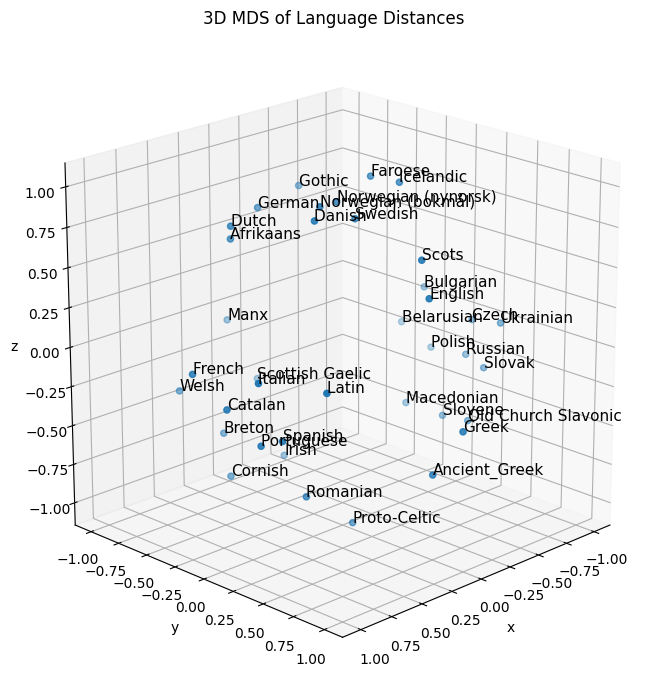

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed for 3D projection)

# Assume coords_3d is a DataFrame with columns ["x","y","z"] and index = language names
df = coords_3d.copy()
df["language"] = df.index.astype(str)

x = df["x"].to_numpy()
y = df["y"].to_numpy()
z = df["z"].to_numpy()
labels = df["language"].to_list()

# --- plot ---
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection="3d")

# marker size: matplotlib uses area in points^2 (so 3 in Plotly won't match 1:1)
ax.scatter(x, y, z, s=20)

# text label size (roughly analogous to Plotly textfont.size)
TEXT_SIZE = 11
for xi, yi, zi, lab in zip(x, y, z, labels):
    ax.text(xi, yi, zi, lab, fontsize=TEXT_SIZE)

ax.set_title("3D MDS of Language Distances")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# --- aspect mode = "data" equivalent (equal scaling across axes) ---
# Matplotlib 3D doesn't do this perfectly by default; set box aspect to data ranges.
xr = float(np.nanmax(x) - np.nanmin(x))
yr = float(np.nanmax(y) - np.nanmin(y))
zr = float(np.nanmax(z) - np.nanmin(z))
ax.set_box_aspect((xr, yr, zr))  # requires matplotlib >= 3.3

# Optional: nice default view angle
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()


In [133]:
# # Matrix rotation for nice colors

# # Maximize x (a) value of Afrikaans and y (b) value for Slavonic

# # Slavic tshould be Green, Romance should be blue-purple, GMC should be red


# import numpy as np
# import pandas as pd

# def unit(v, eps=1e-12):
#     n = np.linalg.norm(v)
#     if n < eps:
#         raise ValueError("Zero-length vector; can't normalize.")
#     return v / n

# def best_rotation_maximize_Ax_plus_Sy(coords_3d, af_name="Afrikaans", sl_name="Catalan "):
#     """
#     Returns:
#       R: 3x3 rotation matrix
#       coords_rot: rotated coords_3d (x,y,z)
#       report: dict with achieved objectives
#     """

#     # Extract points
#     pA = coords_3d.loc[af_name, ["x","y","z"]].to_numpy(dtype=float)
#     pS = coords_3d.loc[sl_name, ["x","y","z"]].to_numpy(dtype=float)

#     # 1) Choose new x-axis u to maximize Afrikaans x: align with pA
#     u = unit(pA)

#     # 2) Choose new y-axis v to maximize Slavonic y subject to v ⟂ u:
#     #    v = normalized projection of pS onto plane orthogonal to u
#     pS_perp = pS - (np.dot(pS, u) * u)
#     if np.linalg.norm(pS_perp) < 1e-10:
#         # Slavonic is collinear with Afrikaans; any v perpendicular to u gives same y (=0)
#         # Pick a stable arbitrary perpendicular direction.
#         # Choose a vector not parallel to u, cross to get perpendicular.
#         tmp = np.array([1.0, 0.0, 0.0]) if abs(u[0]) < 0.9 else np.array([0.0, 1.0, 0.0])
#         v = unit(np.cross(u, tmp))
#     else:
#         v = unit(pS_perp)

#     # 3) New z-axis w to complete right-handed orthonormal basis
#     w = np.cross(u, v)  # already unit because u,v orthonormal (up to numerical noise)
#     w = unit(w)

#     # Orthonormalize v again (numeric stability): ensure v ⟂ u and v ⟂ w
#     v = unit(np.cross(w, u))

#     # Rotation matrix that maps original coords -> new coords:
#     # x' = u·p, y' = v·p, z' = w·p
#     R = np.vstack([u, v, w])  # rows are the new basis vectors

#     # Apply to all points
#     P = coords_3d[["x","y","z"]].to_numpy(dtype=float)           # (N,3)
#     P_rot = (R @ P.T).T                                          # (N,3)

#     coords_rot = coords_3d.copy()
#     coords_rot[["x","y","z"]] = P_rot

#     # Objective values
#     Ax = coords_rot.loc[af_name, "x"]
#     Sy = coords_rot.loc[sl_name, "y"]
#     report = {
#         "Afrikaans_x": float(Ax),
#         "Slavonic_y": float(Sy),
#         "Sum_Ax_plus_Sy": float(Ax + Sy),
#         "Max_possible_Afrikaans_x": float(np.linalg.norm(pA)),
#         "Max_possible_Slavonic_y_given_u": float(np.linalg.norm(pS_perp)) if np.linalg.norm(pS_perp) >= 1e-10 else 0.0,
#         "dot(pS,u)": float(np.dot(pS, u)),
#     }

#     return R, coords_rot, report


# # --- use it ---
# R, coords_3d_rot, report = best_rotation_maximize_Ax_plus_Sy(coords_3d, "Afrikaans ", "Catalan")
# print("Rotation report:", report)
# print(coords_3d_rot.loc[["Afrikaans ","Catalan"], ["x","y","z"]])


In [134]:
# coords_3d = coords_3d_rot

# In Full Technicolor

## What Color space to use?

* Uniform Color Spaces (UCS) seem naively good?
* We want one that also covers value, keep in mind
* CIELAB color space?

In [135]:
import Cielab

In [136]:
coords_3d['z']

Latin                   0.076663
Portuguese             -0.314442
Spanish                -0.256074
French                  0.031443
Italian                 0.105283
Romanian               -0.712917
Catalan                -0.135583
Gothic                  0.770349
Scots                   0.699544
Dutch                   0.770989
Afrikaans               0.657236
German                  0.766617
Danish                  0.895208
Swedish                 0.855296
Faroese                 1.000000
Icelandic               0.992530
Norwegian (bokmål)      0.944688
Norwegian (nynorsk)     0.925336
English                 0.511548
Proto-Celtic           -1.000000
Breton                 -0.609420
Cornish                -0.807292
Welsh                  -0.331626
Irish                  -0.849123
Scottish Gaelic        -0.453586
Manx                   -0.076009
Old Church Slavonic    -0.564935
Czech                  -0.034618
Polish                 -0.312614
Slovak                 -0.269265
Bulgarian 

In [152]:
import numpy as np
import pandas as pd
from sklearn.manifold import MDS


# --- map 3D coordinates into CIELAB space ---

# L* in [0, 100], a* and b* in something modest like [-60, 60]
b = np.interp(coords_3d['x'],
              (coords_3d['x'].min(), coords_3d['x'].max()),
              (80, -80))          # avoid super-dark / super-light extremes

L = np.interp(coords_3d['y'],
              (coords_3d['y'].min(), coords_3d['y'].max()),
              (20, 60))

a = np.interp(coords_3d['z'],
              (coords_3d['z'].min(), coords_3d['z'].max()),
              (-80, 80))

lab_df = pd.DataFrame({'L': L, 'a': a, 'b': b}, index=coords_3d.index)

# --- Lab -> RGB -> hex with Cielab ---

# pip install Cielab  # run once in your environment

from Cielab import cielab_to_rgb, model_d65  # D65 white point, standard sRGB :contentReference[oaicite:1]{index=1}

def lab_to_hex(L, A, B):
    """
    Convert a single CIELAB triple to a #RRGGBB hex string.
    """
    # Convert Lab to RGB (returns a dict-like object with r, g, b or similar)
    rgb_dict = cielab_to_rgb(L, A, B, model=model_d65, format_8b=False)
    r, g, b = rgb_dict.values()  # order is (r, g, b) in this library

    # Ensure values are in 0–255 range
    r = int(np.clip(round(r), 0, 255))
    g = int(np.clip(round(g), 0, 255))
    b = int(np.clip(round(b), 0, 255))

    return f"#{r:02x}{g:02x}{b:02x}"

coords_3d['hex'] = [
    lab_to_hex(L_val, a_val, b_val)
    for L_val, a_val, b_val in zip(lab_df['L'], lab_df['a'], lab_df['b'])
]


# --- optional: display with colored cells in Jupyter ---

def color_hex_column(col):
    return [f'background-color: {c}' for c in col]

display(
    coords_3d.style.apply(color_hex_column, subset=['hex'])
)


,x,y,z,language,hex
Latin,0.751754,0.625849,0.076663,Latin,#0080e5
Portuguese,0.899220,0.235073,-0.314442,Portuguese,#007ce3
Spanish,0.862336,0.375445,-0.256074,Spanish,#0081e6
French,1.000000,-0.230861,0.031443,French,#005cd7
Italian,0.968806,0.290955,0.105283,Italian,#0071f1
Romanian,0.574213,0.274409,-0.712917,Romanian,#0085b8
Catalan,0.956487,0.011315,-0.135583,Catalan,#006dde
Gothic,-0.349140,-0.726919,0.770349,Gothic,#8d0017
Scots,-0.001823,0.643199,0.699544,Scots,#d24f80
Dutch,0.492789,-0.435704,0.770989,Dutch,#860089


In [153]:
# Save colors and coordinates

# Save with index preserved (languages)
out_path = "coords_3d_true_canonical.csv"
coords_3d.to_csv(out_path, index=True)

print(f"Saved to {out_path}")


Saved to coords_3d_true_canonical.csv


In [154]:
import plotly.graph_objects as go

df = coords_3d.copy()
df["language"] = df.index

fig = go.Figure(
    data=[
        go.Scatter3d(
            x=df["x"], y=df["y"], z=df["z"],
            mode="markers+text",
            text=df["language"],
            marker=dict(
                size=5,
                color=df["hex"],  # <-- literal per-point colors
            ),
        )
    ]
)

fig.update_layout(
    scene=dict(
        xaxis_title="L",
        yaxis_title="a",
        zaxis_title="b",
    ),
    scene_aspectmode="data",
    title="3D MDS of Language Distances",
)

fig.show()


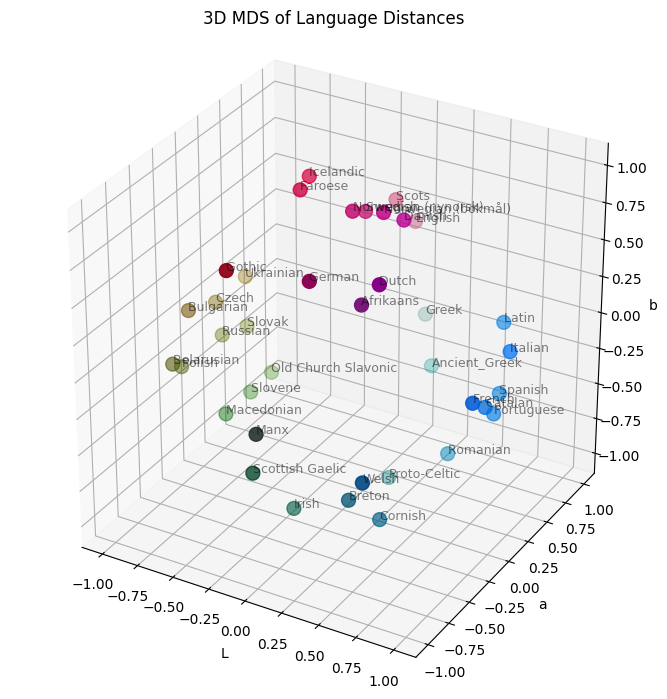

In [157]:
# Matplotlib color scatterplot display

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# df has columns: x, y, z, hex; index (or df["language"]) is the label
df = coords_3d.copy()
df["language"] = df.index.astype(str)

x = df["x"].to_numpy()
y = df["y"].to_numpy()
z = df["z"].to_numpy()
colors = df["hex"].astype(str).to_list()      # e.g. "#A1B2C3"
# labels = df["language"].to_list()

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection="3d")

# Matplotlib supports per-point colors via c=...
ax.scatter(x, y, z, s=100, c=colors, depthshade=True)

# Labels (optional; can get crowded fast)
TEXT_SIZE = 9
for xi, yi, zi, lab in zip(x, y, z, labels):
    ax.text(
        xi, yi, zi, lab,
        fontsize=9,
        alpha=0.5   # 0 = invisible, 1 = fully opaque
    )

ax.set_title("3D MDS of Language Distances")
ax.set_xlabel("L")
ax.set_ylabel("a")
ax.set_zlabel("b")




# aspectmode="data" equivalent
xr = float(np.nanmax(x) - np.nanmin(x))
yr = float(np.nanmax(y) - np.nanmin(y))
zr = float(np.nanmax(z) - np.nanmin(z))
ax.set_box_aspect((xr, yr, zr))  # matplotlib >= 3.3

plt.tight_layout()
plt.show()


In [158]:
# Text displays

from IPython.display import HTML, display

# Example demo strings per language
# Replace with real samples if you have them
LANG_TEXT = {
    "Latin ": "Omnes homines dignitate et iure liberi et pares nascuntur, rationis et conscientiae participes sunt, quibus inter se concordiae studio est agendum. ",
    "Portuguese ": "Todos os seres humanos nascem livres e iguais em dignidade e direitos.",
    "Spanish ": "Todos los seres humanos nacen libres e iguales en dignidad y derechos.",
    "French ": "Tous les êtres humains naissent libres et égaux en dignité et en droits.",
    "Italian ": "Tutti gli esseri umani nascono liberi ed eguali in dignità e diritti.",
    "Romanian ": "Toate ființele umane se nasc libere și egale în demnitate și în drepturi.",
    "Catalan": "Tots els éssers humans neixen lliures i iguals en dignitat i drets.",

    "Gothic ": "Allai manno usgiband frijai jah samaleikans in wairþidai jah in raihtim.",

    "Scots ": "Aw human beings are born free an equal in dignity an richts.",
    "Dutch ": "Alle mensen worden vrij en gelijk in waardigheid en rechten geboren.",
    "Afrikaans ": "Alle mense word vry en gelyk in waardigheid en regte gebore.",
    "German ": "Alle Menschen sind frei und gleich an Würde und Rechten geboren.",
    "Danish ": "Alle mennesker er født frie og lige i værdighed og rettigheder.",
    "Swedish ": "Alla människor är födda fria och lika i värde och rättigheter.",
    "Faroese ": "Øll menniskju eru fødd frí og jøvn í tign og rættindum.",
    "Icelandic ": "Allir menn eru fæddir frjálsir og jafnir að virðingu og réttindum.",
    "Norwegian (bokmål) ": "Alle mennesker er født frie og like i verdighet og rettigheter.",
    "Norwegian (nynorsk) ": "Alle menneske er fødde frie og like i verd og rettar.",

    "English": "All human beings are born free and equal in dignity and rights.",

    "Proto-Celtic": "*Allos (or) *Allī wiros genontī frīyoi h₃epikʷe- (approx.)",
    "Breton": "An holl dud a c'han gant ar frankiz hag an hevelep gwirioù hag enor.",
    "Cornish": "Oll den a vyth genys fre ha kehaval yn delder ha gwir.",
    "Welsh": "Ganwyd pawb yn rhydd ac yn gydradd â'i gilydd o ran urddas a hawliau.",
    "Irish": "Saolaítear gach duine saor agus comhionann i ndínit agus i gcearta.",
    "Scottish Gaelic": "Tha a h-uile duine air a bhreith saor agus co-ionann ann an urram agus ann an còraichean.",
    "Manx": "Ta dy chooilley ghooinney er ny ruggey seyr as corrym ayns ooash as ayns kiartyn.",

    "Old Church Slavonic ": "Вьсꙗкъ чловѣкъ раждаетъ сѧ свободьнъ и равьнъ вь достоꙗньи и правѣхъ.",
    "Czech ": "Všichni lidé se rodí svobodní a sobě rovní co do důstojnosti a práv.",
    "Polish ": "Wszyscy ludzie rodzą się wolni i równi w godności i w prawach.",
    "Slovak ": "Všetci ľudia sa rodia slobodní a rovní si v dôstojnosti a právach.",
    "Bulgarian ": "Всички хора се раждат свободни и равни по достойнство и права.",
    "Macedonian ": "Сите луѓе се раѓаат слободни и еднакви по достоинство и права.",
    "Slovene ": "Vsi ljudje se rodijo svobodni in imajo enako dostojanstvo in enake pravice.",
    "Belarusian ": "Усе людзі нараджаюцца свабоднымі і роўнымі ў сваёй годнасці і правах.",
    "Russian ": "Все люди рождаются свободными и равными в своем достоинстве и правах.",
    "Ukrainian": "Усі люди народжуються вільними й рівними у своїй гідності та правах.",

    "Greek": "Όλοι οι άνθρωποι γεννιούνται ελεύθεροι και ίσοι στην αξιοπρέπεια και στα δικαιώματα.",
    "Ancient_Greek": "Πάντες ἄνθρωποι φύονται ἐλεύθεροι καὶ ἴσοι τῇ ἀξίᾳ καὶ τοῖς δικαίοις.",
}

rows = []
for lang, row in coords_3d.iterrows():
    color = row["hex"]
    text = LANG_TEXT[lang]
    rows.append(
        f"""
        <div style="
            color: {color};
            font-family: 'Georgia', serif;
            font-size: 18px;
            margin: 6px 0;
        ">
            <strong>{lang}:</strong> {text}
        </div>
        """
    )

html = "<div>" + "\n".join(rows) + "</div>"
display(HTML(html))


# Extras

In [159]:
!pip install colorspacious

DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [160]:
# Reference for the CIELAB Color Space

import numpy as np
import pandas as pd
import plotly.graph_objects as go

from colorspacious import cspace_convert


def lab_grid_points(
    L_range=(0, 100),
    a_range=(-128, 127),
    b_range=(-128, 127),
    steps=(21, 21, 21),
    clip_out_of_gamut=False,
):
    """
    Build an evenly-spaced grid in CIELAB and convert to sRGB hex.

    - If clip_out_of_gamut=False (recommended): drop points outside sRGB gamut.
    - If clip_out_of_gamut=True: clamp RGB into [0,1] (keeps all points but distorts colors).
    """

    Ls = np.linspace(L_range[0], L_range[1], steps[0])
    As = np.linspace(a_range[0], a_range[1], steps[1])
    Bs = np.linspace(b_range[0], b_range[1], steps[2])

    # Meshgrid -> list of Lab points
    LL, AA, BB = np.meshgrid(Ls, As, Bs, indexing="ij")
    lab = np.stack([LL.ravel(), AA.ravel(), BB.ravel()], axis=1)  # (N,3)

    # Convert Lab (CIELab) -> sRGB1 (0..1 floats, but may go out of gamut)
    rgb = cspace_convert(lab, "CIELab", "sRGB1")  # shape (N,3)

    if clip_out_of_gamut:
        rgb_in = np.clip(rgb, 0.0, 1.0)
        mask = np.ones(len(rgb_in), dtype=bool)
    else:
        mask = (rgb[:, 0] >= 0) & (rgb[:, 0] <= 1) & \
               (rgb[:, 1] >= 0) & (rgb[:, 1] <= 1) & \
               (rgb[:, 2] >= 0) & (rgb[:, 2] <= 1)
        rgb_in = rgb[mask]
        lab = lab[mask]

    # rgb -> hex
    rgb255 = np.round(rgb_in * 255).astype(np.uint8)
    hex_colors = np.array([f"#{r:02x}{g:02x}{b:02x}" for r, g, b in rgb255])

    df = pd.DataFrame(lab, columns=["L", "a", "b"])
    df["hex"] = hex_colors
    return df


# --- generate a Lab point cloud ---
# steps: increase for denser cloud (but can get heavy in Plotly)
lab_df = lab_grid_points(
    L_range=(0, 100),
    a_range=(-128, 127),
    b_range=(-128, 127),
    steps=(25, 25, 25),          # 25^3 = 15625 candidates before gamut filtering
    clip_out_of_gamut=False
)

fig = go.Figure(
    data=[
        go.Scatter3d(
            x=lab_df["L"], y=lab_df["a"], z=lab_df["b"],
            mode="markers",
            marker=dict(
                size=2,
                color=lab_df["hex"],   # literal per-point colors
                opacity=0.9
            ),
        )
    ]
)

fig.update_layout(
    scene=dict(
        xaxis_title="L*",
        yaxis_title="a*",
        zaxis_title="b*",
    ),
    scene_aspectmode="data",
    title="CIELAB grid (in-gamut points colored by sRGB)"
)

fig.show()


## 2D MDS (For Funsies)

In [116]:
import numpy as np
import pandas as pd
from sklearn.manifold import MDS

# Run 2D MDS
mds = MDS(n_components=2, n_init=2, dissimilarity='precomputed')

coords_2d = pd.DataFrame(
    mds.fit_transform(dist_matrix),
    index=dist_matrix.index,     # label rows by languages
    columns=['x', 'y']      # label columns
)

print(coords_2d)


                             x         y
Latin                -0.190955  0.133435
Portuguese           -0.341569  0.361028
Spanish              -0.389364  0.334635
French               -0.284586  0.210938
Italian              -0.435404  0.243927
Romanian             -0.220138  0.420289
Catalan              -0.331812  0.273385
Gothic               -0.567883 -0.036391
Scots                -0.318394 -0.109269
Dutch                -0.406849 -0.294127
Afrikaans            -0.367606 -0.329044
German               -0.455506 -0.224572
Danish               -0.207407 -0.307098
Swedish              -0.112851 -0.250928
Faroese              -0.157221 -0.450825
Icelandic            -0.101725 -0.458680
Norwegian (bokmål)   -0.192062 -0.339125
Norwegian (nynorsk)  -0.133334 -0.319595
English              -0.402516 -0.063622
Proto-Celtic          0.201981 -0.276094
Breton                0.370964 -0.065711
Cornish               0.350495 -0.123291
Welsh                 0.529444 -0.068701
Irish           

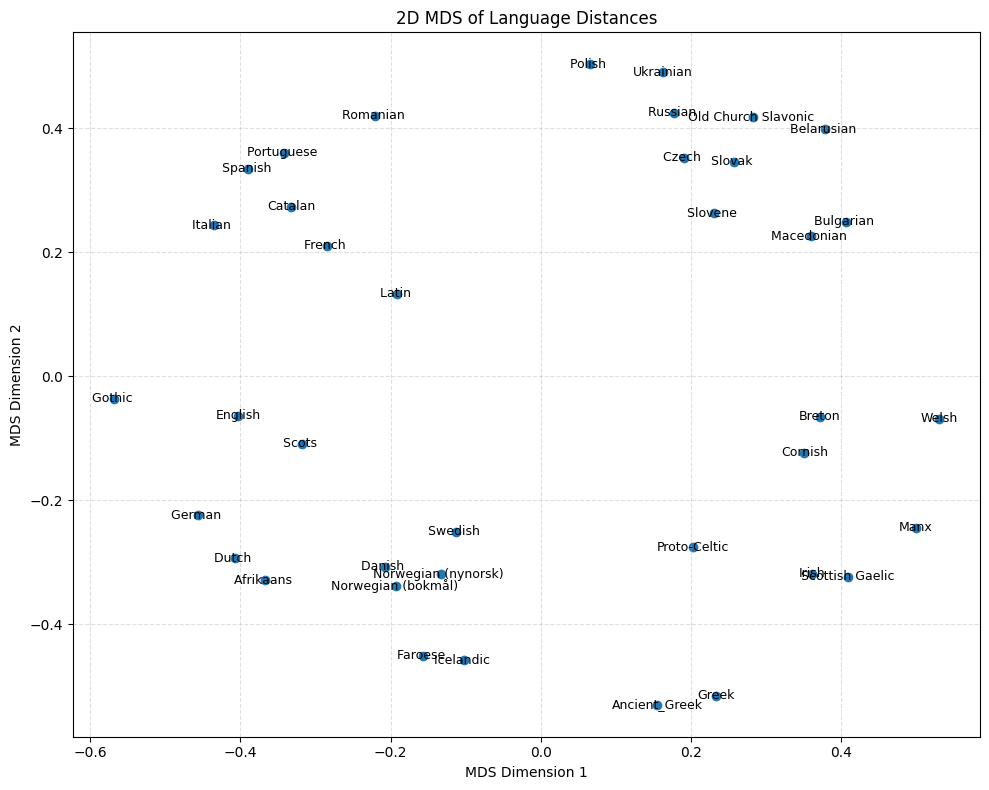

In [117]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Scatter points
plt.scatter(coords_2d['x'], coords_2d['y'])

# Add labels for each language
for lang, row in coords_2d.iterrows():
    plt.text(row['x'], row['y'], lang, fontsize=9, ha='center', va='center')

plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.title("2D MDS of Language Distances")
plt.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


In [118]:
# 2D Colors

In [119]:
# CIELAB 2D colorspace?

import numpy as np
import pandas as pd
from sklearn.manifold import MDS


# --- map 3D coordinates into CIELAB space ---

# Keep L constant
L = 70

a = np.interp(coords_2d['x'],
              (coords_2d['x'].min(), coords_2d['x'].max()),
              (-90, 90))

b = np.interp(coords_2d['y'],
              (coords_2d['y'].min(), coords_2d['y'].max()),
              (-90, 90))

lab_df = pd.DataFrame({'L': L, 'a': a, 'b': b}, index=coords_2d.index)

# --- Lab -> RGB -> hex with Cielab ---

# pip install Cielab  # run once in your environment

from Cielab import cielab_to_rgb, model_d65  # D65 white point, standard sRGB :contentReference[oaicite:1]{index=1}

def lab_to_hex(L, A, B):
    """
    Convert a single CIELAB triple to a #RRGGBB hex string.
    """
    # Convert Lab to RGB (returns a dict-like object with r, g, b or similar)
    rgb_dict = cielab_to_rgb(L, A, B, model=model_d65, format_8b=False)
    r, g, b = rgb_dict.values()  # order is (r, g, b) in this library

    # Ensure values are in 0–255 range
    r = int(np.clip(round(r), 0, 255))
    g = int(np.clip(round(g), 0, 255))
    b = int(np.clip(round(b), 0, 255))

    return f"#{r:02x}{g:02x}{b:02x}"

coords_2d['hex'] = [
    lab_to_hex(L_val, a_val, b_val)
    for L_val, a_val, b_val in zip(lab_df['L'], lab_df['a'], lab_df['b'])
]

print(coords_2d)

# --- optional: display with colored cells in Jupyter ---

def color_hex_column(col):
    return [f'background-color: {c}' for c in col]

display(
    coords_2d.style.apply(color_hex_column, subset=['hex'])
)


                             x         y      hex
Latin                -0.190955  0.133435  #86b87b
Portuguese           -0.341569  0.361028  #63c11e
Spanish              -0.389364  0.334635  #46c32d
French               -0.284586  0.210938  #6bbe61
Italian              -0.435404  0.243927  #00c654
Romanian             -0.220138  0.420289  #94b900
Catalan              -0.331812  0.273385  #5ec049
Gothic               -0.567883 -0.036391  #00cfb0
Scots                -0.318394 -0.109269  #00c3c8
Dutch                -0.406849 -0.294127  #00cbff
Afrikaans            -0.367606 -0.329044  #00c9ff
German               -0.455506 -0.224572  #00ccec
Danish               -0.207407 -0.307098  #00bfff
Swedish              -0.112851 -0.250928  #22b7f6
Faroese              -0.157221 -0.450825  #00beff
Icelandic            -0.101725 -0.458680  #00baff
Norwegian (bokmål)   -0.192062 -0.339125  #00beff
Norwegian (nynorsk)  -0.133334 -0.319595  #00baff
English              -0.402516 -0.063622  #00c7b9


,x,y,hex
Latin,-0.190955,0.133435,#86b87b
Portuguese,-0.341569,0.361028,#63c11e
Spanish,-0.389364,0.334635,#46c32d
French,-0.284586,0.210938,#6bbe61
Italian,-0.435404,0.243927,#00c654
Romanian,-0.220138,0.420289,#94b900
Catalan,-0.331812,0.273385,#5ec049
Gothic,-0.567883,-0.036391,#00cfb0
Scots,-0.318394,-0.109269,#00c3c8
Dutch,-0.406849,-0.294127,#00cbff


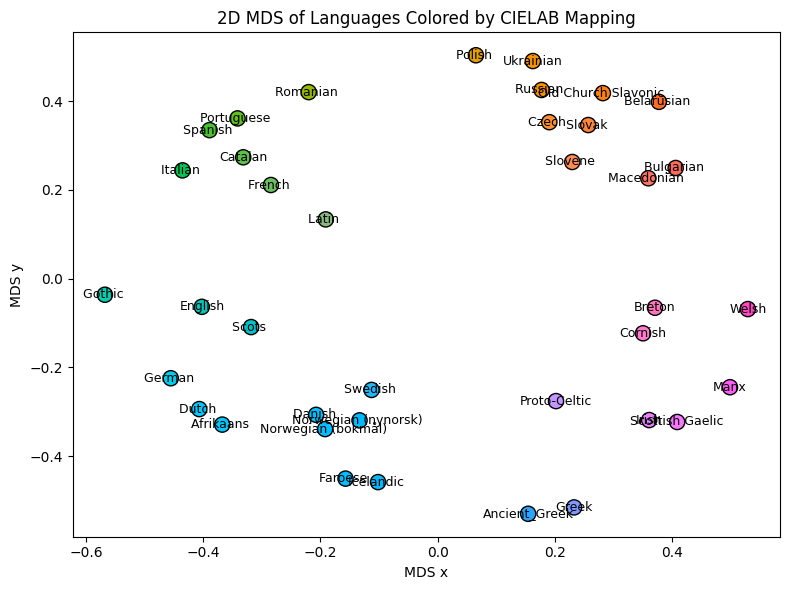

In [120]:
import matplotlib.pyplot as plt

# coords_2d must contain columns: ['x', 'y']
# coords_3d (or coords_2d if you attached it there) must contain: ['hex']

# Decide where the hex column is stored:
colors = coords_2d['hex']    # or coords_2d['hex'] if you moved it earlier

fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(
    coords_2d['x'],
    coords_2d['y'],
    c=colors,         # matplotlib accepts hex strings directly
    s=120,            # nice chunky points
    edgecolor='black'
)

# Label each point with the language name
for lang, (x, y) in coords_2d[['x', 'y']].iterrows():
    ax.text(x, y, lang, fontsize=9, ha='center', va='center')

ax.set_xlabel("MDS x")
ax.set_ylabel("MDS y")
ax.set_title("2D MDS of Languages Colored by CIELAB Mapping")

plt.tight_layout()
plt.show()
